## Transfer Learning

Çalışmada kullanılan veri setine https://www.kaggle.com/datasets/moltean/fruits linkinden ulaşabilirsiniz.

Transfer learning, öğrenilen bilginin transferi anlamına gelmektedir.

<br>
<img src="t1.png" align="left" style="width:600px;height:100px"/> 

Yukarıdaki CNN yapısını eğittiğimiz zaman filtreler ve fully connected layer'daki weight'ler öğrenilmektedir. Filtrelerde weight'lerden oluştuğu için özetle weight'ler öğreniliyor denilebilir.

<br>
<img src="t2.png" align="left" style="width:600px;height:300px"/> 

İnput'lar 10 farklı class'a ait resimlerdir. Şekilde gördüğünüz kırmızı daireler katmanlardır. İlk katmanda low level feature'ler öğrenilmiştir. Ve bu katmandan kesilerek sağ altta gördüğünüz mavi daireler ile yeni neural network yapısını kurdum. İlk baştaki 10 tane class'tan farklı olarak yeni class'ları eğitmeye başladım. Yeni class koyulduğu için input'ta değişti. Yani daha önceden elde edilen low level kısmında elde edilen feature'leri kullanarak yani pretrained feature'leri kullanarak yeni class için fine tuning yaptım. Kesilen yere kadar ki weight'ler daha önceki dataset'ten öğrenilmiş weight'lerdir.

<br>
<img src="t3.png" align="left" style="width:600px;height:300px"/> 

Yukarıdaki görseli açıklayayım. kedi ve köpek class'ları için eğitim gerçekleştirilmiştir. Sonrasında kedi ve köpek class'larına birde bird class'ı eklenmiştir. Bu durumda en baştan tekrar eğitim gerçekleştirmek yerine kedi ve köpek class'ları için eğitilen yapıda sigmoid'in hemen öncesinden kesilir ve pretrained modelin en sonuna softmax eklenir. Ve sonucunda output elde edilir. pretrained kısmını freeze ederiz yani dondururuz, giçbir şekilde engellemeyiz. Eski kedi ve köpek class resimleri olan input yerine yeni kedi, köpek ve kuş resimlerinin olduğu input'u veririz. Kesilen kısma kadarki weight'ler değişmez. Bir tek son katmandan softmax'e bağlanan weight ve output'a giden weight değişir. Böylece yeni veri setine pretrained modeli adapte etmiş oluruz. Bunada fine tuned denir.

Bu işlem çok fazla layer'ı olan network'ler için zaman kaybını önler. Ayrıca mesela 1000 layer'a sahip network'ü bizim bilgisayarlarımızı eğitemez. Transfer Learning tiplerini bulan insanlar milyonlarca veriseti kullanarak çok güçlü bilgisayarlarda eğitip bize bunları sağlıyorlar. Bu yüzden çok güçlü bir network kullanmak istiyorsak baştan sona eğitemeyiz, o network'ü transfer learning ile kendi kullanmak istediğimiz verisetine entegre edebiliriz.

Transfer learning konusunda kullanılan tüm modeller kendilerini ispat etmiş, hyperparameter değerleri ayarlanmıştır. 

ResNet transfer learning'te kullanılabilmektedir. ResNet default olarak 152 tane layer'dan oluşmaktadır. 

ResNet, vanishing gradient modeline çözüm ürettiği için transfer learning'te en başarılı model olarak nitelendirilmektedir.

VGG-19 ifadesinde 19 değeri layer sayısını göstermektedir. 16 tane katman var ise VGG-16'dır. VGG, farklı farklı convolutional layer'ın ard arda dizilmesiyle ortaya çıkan bir yapıdır.



VGG-19 ve ResNet-152 modellerini transfer learning uygulamasında kullanacağız. Bu modellerin bir veri seti tarafından eğitilmiş olması gerekiyor. Keras ImageNet isimli bir veri seti tarafından eğittiği VGG ve ResNet modellerini sağlıyor.

ImageNet 14 milyondan fazla resimden ve 1000 tane class'tan oluşan bir veri setidir. VGG ve ResNet bununla eğitilmiş feature extraction çıkartılmış, weight'ler belirlenmiş en optimum hyperparameter tone edilmiş iki tane model bizlerin kullanabilmesi için sunulmuştur.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16  #VGG16 modeli import edilmiştir.
import matplotlib.pyplot as plt
from glob import glob

In [2]:
train_path = "C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/4-TransferLearning/fruits-360_dataset/fruits-360/Training"
test_path = "C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/4-TransferLearning/fruits-360_dataset/fruits-360/Test"

In [3]:
numberOfClass = len(glob(train_path+"/*"))

In [4]:
numberOfClass

131

In [5]:
from keras.applications.vgg16 import VGG16 
vgg = VGG16(include_top = False,input_shape = (100,100,3)) #16 layerdan oluşan VGG modeli

Yukarıda VGG modeli oluşturulmuştur.

Şimdi VGG'nin içerisindeki layer'lara bakalım.

In [6]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [7]:
print(type(vgg))

<class 'keras.engine.functional.Functional'>


Yukarıda görüldüğü üzere vgg bir keras modelidir.

In [8]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.engine.input_layer.InputLayer object at 0x0000010D3C7A8C10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D64168D90>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D60E3E3D0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000010D641C0760>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D64168FD0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D05F44430>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000010D05F60A60>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D05F578B0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D05F60A30>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D05F6D760>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000010D05F684F0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D05F68430>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000010D05F740D0>, <keras.layers.convolutional.conv2d

Yukarıdaki çıktıda VGG'nin layer'ları görülmektedir. Yukarıdaki kod bloğunun summary() işleminden çok bir farkı yoktur. Sadece liste halinde bir çıktı elde edilmiştir.



In [9]:
len(vgg_layer_list)

19

Görüldüğü üzere 23 farklı layer var. Fakat VGG16 ifadesinden anlaşılacağı üzere 16 katmana sahip olmalıydı. Bunun sebebi, pooling'ler kullanılmıyor.

Transfer learning yapılacağı için layer'lardan bir tanesini çıkaralım ve kendi output'umuzu koyalım. SOn katmanda görüldüğü üzere 1000 tane class'tan oluşan bir veri seti kullanılarak eğitilen bir vgg modeli vardır. Ama 1000 tane class yok, 95 tane class var. Dolayısıyla son layer'ı çıkaracağız. Ve bunun yerine kendi output layer'ımızı ekleyeceğiz. Bu işlemleri gerçekleştirelim.

In [10]:
model = Sequential()

Son output layer'ı 1000 tane class'ı sınıflandırmak için kurulmuştur. Bunu 95 yapalım.

In [11]:
for i in range (len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

Yukarıdaki kod bloğu ile yapılan şudur: vgg_layer_list içerisindeki en sonuncu layer hariç her bir layer'ı model içerisine ekleyeceğiz.

Peki neden son layer'ı çıkarıyoruz?: Şu an sadece göstermek amacıyla son layer'ı çıkarıyoruz. Zaten VGG19'u kullanırken flatten kısmından bağlantıyı kesip kendi neural network'ümüzü eğitmeye başlayacağız.

Şimdi model isimli değişken içerisine depoladıklarımıza bakalım.

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 25, 25, 256)       2

Görüldüğü üzere prediction isimli son layer yani output layer'ı artık yoktur. Buraya kendi layer'ımızı ekleyeceğiz. Ama bu işlemden önce yapmamız gereken bir şey vardır.

In [13]:
for layers in model.layers:
    layers.trainable = False

Yukarıdaki kod bloğu ile yapılan şudur: Her bir layer'ı dolanıyoruz ve her bir layer'ın trainable=False ile train edilmemesini sağlıyoruz. Daha önceden ImageNet data'sı kullanılarak train edilmiş weight'leri kullanacağız. Sadece en son layer'ın weight'lerini train etmek istiyoruz. Bu yüzden diğer layer'ların trainable'lerini False değerine eşitleyerek train edilmesini engelledik.

In [14]:
model.add(Flatten()) 
model.add(Dense(256, activation="relu")) 
model.add(Dense(150, activation="relu"))

In [15]:
model.add(Dense(numberOfClass, activation="softmax"))

Yukarıdaki kod ile model'e Dense layer yani output layer ekledik. Output layer'ında belirtmemiz gereken 2 tane özellik var. Birincisi number of class'tır yani kaç tane nörondan oluşacağıdır. Yukarıdaki satırlarda tanımladığımız numberOfClass değişkeninde 131 değeri bulunmaktadır. Aktivasyon fonksiyonu da multiclass için kullandığımız Softmax fonksiyonu olacaktır.

Şimdi modelin katmanlarına bakalım.

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 25, 25, 256)       2

In [17]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

Daha önceden eğitilmiş bir model aldık. Weight'leri vs her şeyi var. Bu yapıdan son layer'ı çıkararak yerine kendi output layer'ımızı ekledik. Yeni yapıda öğrenilmesi gereken son layer'a ait weight'lerdir. Bunlar train edilerek öğrenilecek ve böylece vgg'yi daha önceden eğitilmiş bir modeli kullanarak kendi yapımıza bu modeli transfer etmiş olucaz. Böylelikle transfer learning uygulanmış olucak.

Şimdi train etme aşamasını yapalım.

In [18]:
# train  
train_data = ImageDataGenerator().flow_from_directory(train_path,target_size = (100,100))
test_data = ImageDataGenerator().flow_from_directory(test_path,target_size = (100,100))

batch_size = 32

hist = model.fit_generator(train_data,
                           steps_per_epoch=1600//batch_size,
                           epochs= 13,
                           validation_data=test_data,
                           validation_steps= 800//batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/13


C:\Users\raziy\AppData\Local\Temp\ipykernel_16444\2878676473.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


50/50 [==============================] - 17s 265ms/step - loss: 13.3453 - accuracy: 0.1900 - val_loss: 4.4041 - val_accuracy: 0.2562
Epoch 2/13
50/50 [==============================] - 13s 265ms/step - loss: 3.0581 - accuracy: 0.4263 - val_loss: 3.2776 - val_accuracy: 0.4275
Epoch 3/13
50/50 [==============================] - 14s 278ms/step - loss: 2.1936 - accuracy: 0.5719 - val_loss: 2.7831 - val_accuracy: 0.5075
Epoch 4/13
50/50 [==============================] - 17s 341ms/step - loss: 1.4998 - accuracy: 0.6862 - val_loss: 3.1727 - val_accuracy: 0.5400
Epoch 5/13
50/50 [==============================] - 17s 340ms/step - loss: 1.3005 - accuracy: 0.7538 - val_loss: 2.0210 - val_accuracy: 0.6862
Epoch 6/13
50/50 [==============================] - 16s 319ms/step - loss: 0.9591 - accuracy: 0.8138 - val_loss: 2.0068 - val_accuracy: 0.6900
Epoch 7/13
50/50 [==============================] - 16s 326ms/step - loss: 0.8272 - accuracy: 0.8356 - val_loss: 2.4591 - val_accuracy: 0.6988
Epoch 8/1

flow_from_directory() metodunun 2 tane önemli parametresi vardır. Birisi train_path ve diğeri ise target_size'dır. target_size, training'teki resimlerin shape'sidir.

Normalde 100,100 boyutunda resimler mevcut. Fakat target_size parametresine 224,224 değerini atadık. Bunun sebebi, vgg modeli train dataset ImageNet tarafından eğitildiği için buradaki resimler 224x224 'lüktür. Bunu vgg modele verdiğimizde vgg'nin input shape'i 224x224 oluyor. Bunu 2 farklı yolla halledebiliriz. Birinci yol, target size'ı 100x100 'den 224x224'e çevirebiliriz. Bu işlemi ImageDataGenerator ile yapabiliriz. ImageDataGenerator 100x100'lük resimleri resize ile 224x224'lük hale getirebiliriz. Bir başka yöntem ise vgg'nin input shape'ini 100x100'lük olsun şeklinde yapabiliriz.

fit_generator'ın parametreleri: 1.parametreye train edeceğimiz data'dır. 2.parametredeki steps_per_epoch=1600//batch_size ifadesi ile yaklaşık 50 tane steps_per_epoch kullanılması sağlanmıştır. Son parametredeki validation_steps=800//batch_size ifadesi ile validation_steps'in 25 olması sağlanmıştır.

In [19]:
model.save_weights("deneme.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


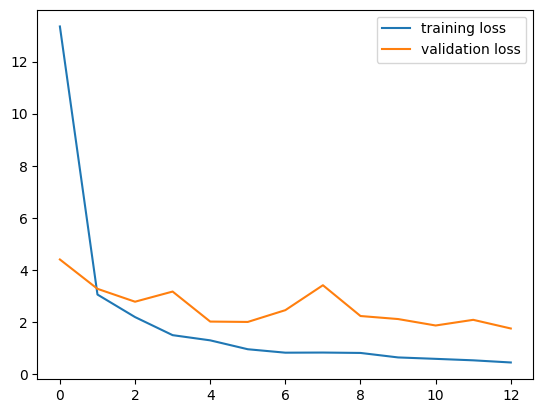

In [22]:
#evaluation
#loss
print(hist.history.keys())
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],label="validation loss")
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


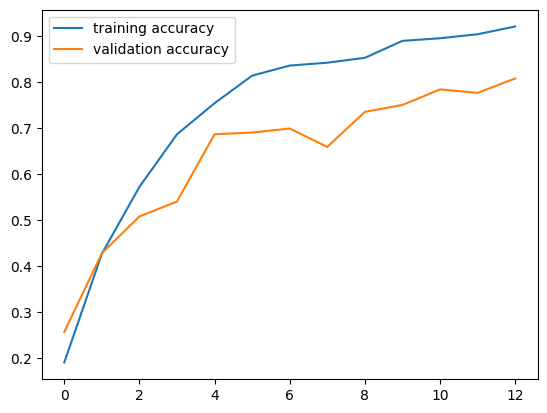

In [24]:
#evaluation
#accuracy
print(hist.history.keys())
plt.plot(hist.history["accuracy"],label="training accuracy")
plt.plot(hist.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

Şimdi de elde ettiğimiz hist değişkenini kaydedelim. Çünkü kernel'ı kapatıp açtıktan sonra da sonuçları görebilmek ve değerlendirebilmek istiyoruz.

In [26]:
#save history
import json, codecs
with open("deneme.json","w") as f:
    json.dump(hist.history,f)

Şimdi de daha önceden yapmış olduğumuz history'leri yükleyelim.

In [29]:
#Load history
with codecs.open("deneme.json","r",encoding="utf-8") as f:
    n = json.loads(f.read())

In [30]:
n

{'loss': [13.345322608947754,
  3.0580904483795166,
  2.193557024002075,
  1.4997797012329102,
  1.3005423545837402,
  0.9591493010520935,
  0.8271544575691223,
  0.8321137428283691,
  0.8172743320465088,
  0.6449516415596008,
  0.590584933757782,
  0.5338531732559204,
  0.45122790336608887],
 'accuracy': [0.1899999976158142,
  0.42625001072883606,
  0.5718749761581421,
  0.6862499713897705,
  0.7537500262260437,
  0.8137500286102295,
  0.8356249928474426,
  0.8418750166893005,
  0.8525000214576721,
  0.8893749713897705,
  0.8949999809265137,
  0.9037500023841858,
  0.9206249713897705],
 'val_loss': [4.404085159301758,
  3.2775702476501465,
  2.7830963134765625,
  3.172743797302246,
  2.02095365524292,
  2.0068156719207764,
  2.4591219425201416,
  3.4156148433685303,
  2.2340893745422363,
  2.117908239364624,
  1.8705073595046997,
  2.087801456451416,
  1.7554597854614258],
 'val_accuracy': [0.2562499940395355,
  0.42750000953674316,
  0.5074999928474426,
  0.5400000214576721,
  0.6862

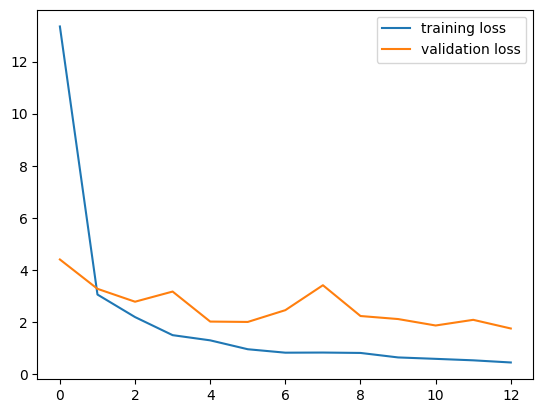

In [31]:
#evaluation
#loss
plt.plot(n["loss"],label="training loss")
plt.plot(n["val_loss"],label="validation loss")
plt.legend()
plt.show()

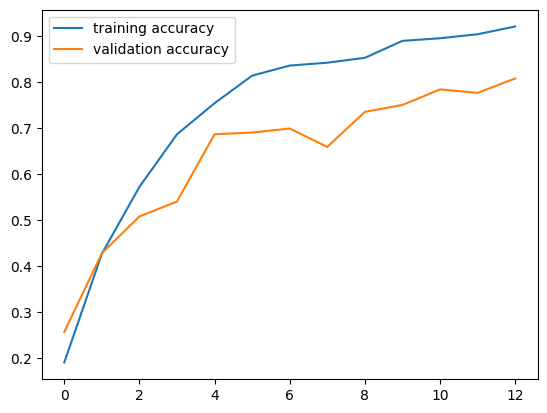

In [32]:
#evaluation
#accuracy
plt.plot(n["accuracy"],label="training accuracy")
plt.plot(n["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

Böylelikle daha önceden kaydettiğimiz deneme.json'ı yükleyerek plot ettirdik.